In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

from main.data_tools.extract_Nevents import get_Nevents

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [3]:
file1_name="test2_x_D0.png"
file2_name="test2_y_D0.png"
# file1_name="test2_x_D0bar.png"
# file2_name="test2_y_D0bar.png"
file1_name="/media/jykim/T7/saved_plots/fitting/results/phigamma/2d_fit/mc15rd_4S_D0M.png"
file2_name="/media/jykim/T7/saved_plots/fitting/results/phigamma/2d_fit/mc15rd_4S_cosHel.png"


# Extract 2D data(ROOT)

In [4]:
base_file_loc =  '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'

loc_ccbar = base_file_loc + 'ccbar/*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar = base_file_loc + 'uubar/*.root'
loc_ddbar = base_file_loc + 'ddbar/*.root'
loc_ssbar = base_file_loc + 'ssbar/*.root'
loc_charged = base_file_loc + 'charged/*.root'
loc_mixed = base_file_loc + 'mixed/*.root'
loc_taupair = base_file_loc + 'taupair/*.root'

file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]


loc_ccbar_CC = base_file_loc + 'ccbar/*.root/phi_cc'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar_CC = base_file_loc + 'uubar/*.root/phi_cc'
loc_ddbar_CC = base_file_loc + 'ddbar/*.root/phi_cc'
loc_ssbar_CC = base_file_loc + 'ssbar/*.root/phi_cc'
loc_charged_CC = base_file_loc + 'charged/*.root/phi_cc'
loc_mixed_CC = base_file_loc + 'mixed/*.root/phi_cc'
loc_taupair_CC = base_file_loc + 'taupair/*.root/phi_cc'


file_list += [loc_ccbar_CC,loc_uubar_CC,loc_uubar_CC,loc_ssbar_CC,loc_charged_CC,loc_mixed_CC,loc_taupair_CC]


In [5]:
mychain = ROOT.TChain("phi")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain.Add(i)

In [6]:
print(file_list)

['/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ssbar/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/charged/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/mixed/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/taupair/*.root', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root/phi_cc', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root/phi_cc', '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/uubar/*.root/phi_cc', '/media/jykim/

In [7]:
yrange = (-1, 1)
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
a = ROOT.RooRealVar("Phi_M", "",0,10, "")
b = ROOT.RooRealVar("Dstarp_CMS_p", "",0,10, "")
c = ROOT.RooRealVar("Dstarp_isSignal", "",-10,10, "")
d = ROOT.RooRealVar("gamma_E", "",0,10, "")
e = ROOT.RooRealVar("Pi0_Prob2", "",0,10, "")
f = ROOT.RooRealVar("Dstarp_delM", "",0,10, "")
# g = ROOT.RooRealVar("iCascDcyBrP_Dst_0", "",-200,200, "")

# h = ROOT.RooRealVar("iCascDcyBrP_Dstm_0", "",-200,200, "")

In [8]:
Cut="D0_M>1.68 & D0_M<2.05 & abs(Phi_M - 1.0195) < 0.011 &  Dstarp_CMS_p>2.5  "
Cut+="& gamma_E>0.47 & Pi0_Prob2>0.5 & abs(Dstarp_delM-0.1455)<0.00078"
# Cut+="& gamma_E>0.47 & Pi0_Prob2>0.5 & abs(Dstarp_delM-0.1455)<0.00078 & (iCascDcyBrP_Dst_0==7 | iCascDcyBrP_Dst_0==16 | iCascDcyBrP_Dst_0==12)"

# Cut=" iCascDcyBrP_Dst_0>0 && iCascDcyBrP_Dst_0<2 "

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,a,b,c,d,e,f), ROOT.RooFit.Import(mychain), Cut=Cut)


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)

w_1.setVal(1/4)
# w_1.setVal(1)
before_data.addColumn(w_1)
data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data.sumEntries()
print(N_total)

2122.75
[#1] INFO:InputArguments -- The formula D0_M>1.68 & D0_M<2.05 & abs(Phi_M - 1.0195) < 0.011 &  Dstarp_CMS_p>2.5  & gamma_E>0.47 & Pi0_Prob2>0.5 & abs(Dstarp_delM-0.1455)<0.00078 claims to use the variables (D0_M,D0_cosHel_0,Phi_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM) but only (D0_M,Phi_M,Dstarp_CMS_p,gamma_E,Pi0_Prob2,Dstarp_delM) seem to be in use.
  inputs:         D0_M>1.68 & D0_M<2.05 & abs(Phi_M - 1.0195) < 0.011 &  Dstarp_CMS_p>2.5  & gamma_E>0.47 & Pi0_Prob2>0.5 & abs(Dstarp_delM-0.1455)<0.00078
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #13 because D0_M cannot accommodate the value 1.64983
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #21 because D0_M cannot accommodate the value 1.65855
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #38 because D0_M cannot accommodate the value 1.65957
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ev

In [9]:
data.Print()

RooDataSet::data[D0_M,D0_cosHel_0,Phi_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,weight:w_1] = 8491 entries (2122.75 weighted)


In [10]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94628232532416

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


In [11]:
# ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "y", "", "1-y*y")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

94628235123568

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


Info in <ACLiC>: unmodified script has already been compiled and loaded


## Vg

### D0M

In [12]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/MC15rd/phig_MC15rd_Vg_fitresult_D0M.root")
result_object = ROOT.gDirectory.Get("phig")
f.Close()

fit_args = result_object.floatParsFinal()

x_sig_alpha= ROOT.RooRealVar("x_sig_alpha", "",  fit_args.at(0).getVal()) 
x_sig_mean = ROOT.RooRealVar("x_sig_mean", "",  fit_args.at(1).getVal()) 
# x_sig_mean = ROOT.RooRealVar("x_sig_mean", "mean of gaussians", 1.863,1.86, 1.88)

x_sig_n_CB = ROOT.RooRealVar("x_sig_n_CB", "",  fit_args.at(2).getVal()) 
x_sig_sig1frac = ROOT.RooRealVar("x_sig_sig1frac", "",  fit_args.at(3).getVal()) 
x_sig_sigma1 = ROOT.RooRealVar("x_sig_sigma1", "",  fit_args.at(4).getVal()) 
x_sig_sigma2 = ROOT.RooRealVar("x_sig_sigma2", "",  fit_args.at(5).getVal()) 

### cosHel 

In [13]:
y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)

## Vpi0

### D0M

In [4]:
result_object2

In [3]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/MC15rd/phig_MC15rd_Vpi0_fitresult.root")
result_object2 = ROOT.gDirectory.Get("phig")
f.Close()
fit_args2 = result_object2.floatParsFinal()

#V pi0
# x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "",  fit_args2.at(0).getVal()) 
# x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "",  fit_args2.at(1).getVal()) 
# x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "",  fit_args2.at(2).getVal()) 
# x_bkg1frac1 = ROOT.RooRealVar("x_bkg1frac1", "",  fit_args2.at(3).getVal()) 
# x_bkg1_sigma1 = ROOT.RooRealVar("x_bkg1_sigma1", "",  fit_args2.at(4).getVal()) 
# x_bkg1_sigma2 = ROOT.RooRealVar("x_bkg1_sigma2", "",  fit_args2.at(5).getVal()) 

x_bkg1_alpha = ROOT.RooRealVar("x_bkg1_alpha", "",  fit_args2.at(0).getVal()) 
x_bkg1_mean = ROOT.RooRealVar("x_bkg1_mean", "",  fit_args2.at(1).getVal()) 
x_bkg1_n_CB = ROOT.RooRealVar("x_bkg1_n_CB", "",  fit_args2.at(2).getVal()) 
x_bkg1_sigma2 = ROOT.RooRealVar("x_bkg1_sigma2", "",  fit_args2.at(3).getVal()) 


### cosHel 

In [15]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94628239962656

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


Info in <ACLiC>: unmodified script has already been compiled and loaded


In [16]:
y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)

## phi X

### D0M

In [17]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/MC15rd/phig_MC15rd_phiX_fitresult_D0M.root")
result_object3 = ROOT.gDirectory.Get("phig")
f.Close()

fit_args3 = result_object3.floatParsFinal()

x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "",  fit_args3.at(0).getVal()) 
# x_bkg2_frac = ROOT.RooRealVar("x_bkg2_frac", "",  fit_args3.at(1).getVal()) 
x_bkg2_frac = ROOT.RooRealVar("x_bkg2_frac", "", 0.5, 0.0, 1.0) 

x_bkg2_sigma = ROOT.RooRealVar("x_bkg2_sigma", "",  fit_args3.at(2).getVal()) 
x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "",  fit_args3.at(3).getVal()) 

### cosHel 

In [18]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/MC15rd/phig_MC15rd_phiX_fitresult_cosHel.root")
result_object3_y = ROOT.gDirectory.Get("phig")
f.Close()

fit_args3_y = result_object3_y.floatParsFinal()


y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "",  fit_args3_y.at(0).getVal()) 
y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "",  fit_args3_y.at(1).getVal()) 

## others

### D0M

In [19]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/MC15rd/phig_MC15rd_except_Vg_Vpi0_phiX_fitresult_D0M.root")
result_object4 = ROOT.gDirectory.Get("phig")
f.Close()

fit_args4 = result_object4.floatParsFinal()

# x_bkg3_tau = ROOT.RooRealVar("x_bkg3_tau", "",  fit_args4.at(0).getVal()) 
x_bkg3_tau = ROOT.RooRealVar("x_bkg3_tau", "tau",-5, -10,0)

### cosHel 

In [20]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/phigamma/MC15rd/phig_MC15rd_except_Vg_Vpi0_phiX_fitresult_cosHel.root")
result_object4_y = ROOT.gDirectory.Get("phig")
f.Close()

fit_args4_y = result_object4_y.floatParsFinal()


y_bkg3_c0 = ROOT.RooRealVar("y_bkg3_c0", "",  fit_args4_y.at(0).getVal()) 
y_bkg3_c1 = ROOT.RooRealVar("y_bkg3_c1", "",  fit_args4_y.at(1).getVal()) 

## Fitting

In [21]:
#D0_M
x_sig_sig1 = ROOT.RooGaussian("x_sig_sig1", "Signal component 1", x, x_sig_mean, x_sig_sigma1)
x_sig_sig2 =  ROOT.RooCBShape("x_sig_sig2", "Signal component 2", x, x_sig_mean, x_sig_sigma2, x_sig_alpha, x_sig_n_CB)
x_sig_model = ROOT.RooAddPdf("x_sig_model", "model", [x_sig_sig1, x_sig_sig2], x_sig_sig1frac)

x_bkg1_model = ROOT.RooCBShape("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)


x_bkg2_1 = ROOT.RooGaussian("x_bkg2_1", "Signal component 1", x, x_bkg2_mean, x_bkg2_sigma)
x_bkg2_2 = ROOT.RooPolynomial("x_bkg2_2", "Signal component 2", x, ROOT.RooArgList(x_bkg2_c0))
x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "model", [x_bkg2_1, x_bkg2_2], x_bkg2_frac)


x_bkg3_model = ROOT.RooExponential("x_bkg3_model", "model", x, x_bkg3_tau)

[#0] WARNING:InputArguments -- The parameter 'x_sig_sigma1' with range [-1e+30, 1e+30] of the RooGaussian 'x_sig_sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'x_bkg2_sigma' with range [-1e+30, 1e+30] of the RooGaussian 'x_bkg2_1' exceeds the safe range of (0, inf). Advise to limit its range.


In [22]:
#cosHel
y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)

y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)

y_bkg2_model= ROOT.RooChebychev("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1))

y_bkg3_model= ROOT.RooChebychev("y_bkg3_model", "Signal component 1", y, ROOT.RooArgList(y_bkg3_c0, y_bkg3_c1))


In [23]:
sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))

bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))
bkg3_xy_model = ROOT.RooProdPdf("bkg3_xy_model","bkg3_xy_model",ROOT.RooArgSet(x_bkg3_model,y_bkg3_model))



In [24]:
nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.01,0,N_total*0.5)
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",N_total*0.8,0, N_total)
nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",N_total*0.1,0, N_total*0.5)
nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",N_total*0.1,0, N_total*0.5)

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model, bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2,nbkg3))


[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable ! 
[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(extended_model) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corrected HESSE error matrix
             (error will be proportional to the number of events in MC).
           - Or provide SumW2Error(false), to return errors from original HESSE error matrix
             (which will be proportional to the sum of the weights, i.e., a dataset with <sum of weights> events).
           - Or provide AsymptoticError(true), to use the asymptotically correct express

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/phigamma/2d_fit/mc15rd_4S_D0M.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/phigamma/2d_fit/mc15rd_4S_cosHel.png has been created


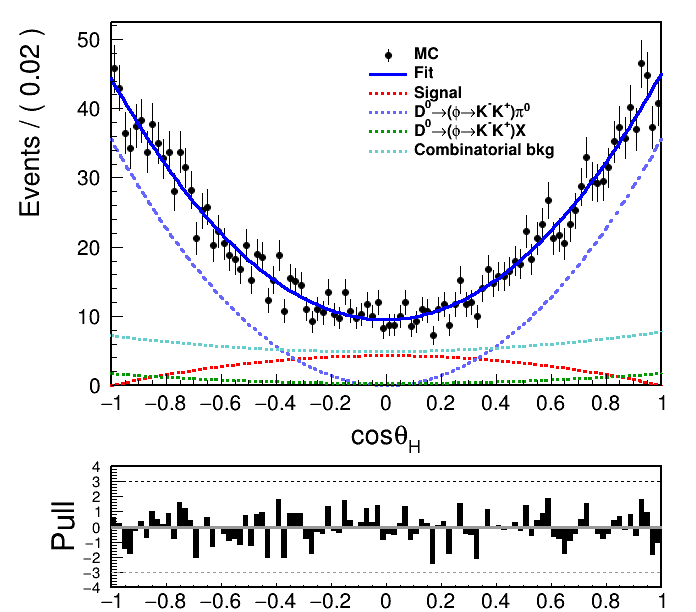

In [25]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    # r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r = sig_xy_model.fitTo(data,NumCPU=12, Range=(1.70,1.98))
# r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE)
r = extended_model.fitTo(data,NumCPU=12, Extended=ROOT.kTRUE,PrintLevel=-1, Save=1)


r.Print()
canv.cd(1) 
#     frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")
extended_model.plotOn(frame, Name="fitx_sig", Components=x_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
# extended_model.plotOn(frame, Name="fitx_bkg", Components=ROOT.RooArgSet(x_bkg1_model,x_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(frame, Name="fitx_bkg1", Components=x_bkg1_model, LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(frame, Name="fitx_bkg2", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(frame, Name="fitx_bkg3", Components=x_bkg3_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)



# extended_model.plotOn(frame, Name="fitx1", Components=x_bkg2_model, LineStyle=ROOT.kDashed, LineColor=593)

# extended_model.plotOn(frame, Name="fitx2", Components=x_sig_3, LineStyle=ROOT.kDashed, LineColor='r')
#sig_xy_model.plotOn(frame, Name="fitx3", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

extended_model.plotOn(frame,Name="fitting")
frame.Draw("PE")

    # sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

    

leg1 = ROOT.TLegend(0.62, 0.65, 0.92, 0.9)
# leg1.SetFillColor(ROOT.kWhite)
leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("fitx_sig", "Signal", "l")
leg1.AddEntry("fitx_bkg1", "D^{0}#rightarrow(#phi#rightarrowK^{-}K^{+})#pi^{0}", "l")
leg1.AddEntry("fitx_bkg2", "D^{0}#rightarrow(#phi#rightarrowK^{-}K^{+})X", "l")
leg1.AddEntry("fitx_bkg3", "Combinatorial bkg", "l")
# leg1.AddEntry("fitx_bkg3", "bkg3", "l")

# leg1.SetTextSize(0.05)
# leg1.SetTextAlign(13)

leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.68)
xmax1 = ctypes.c_double(2.05)
    # xmin1 = 0.1
    # xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kGray+1)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kBlack)
line2.SetLineColor(ROOT.kGray+1)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs(file1_name)

#######################################
canv2 = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
# canv2.cd()
y_xlow = ctypes.c_double()
y_ylow = ctypes.c_double()
y_xup = ctypes.c_double()
y_yup = ctypes.c_double()

canv2.GetPad(0).GetPadPar(y_xlow, y_ylow, y_xup, y_yup)
canv2.Divide(1,2)

y_xlow = y_xlow.value
y_ylow = y_ylow.value
y_xup = y_xup.value
y_yup = y_yup.value

y_upPad = canv2.GetPad(1)
y_upPad.SetPad(y_xlow, y_ylow+0.25*(y_yup-y_ylow),y_xup,y_yup)

y_dwPad = canv2.GetPad(2)
y_dwPad.SetPad(y_xlow, y_ylow,y_xup,y_ylow+0.25*(y_yup-y_ylow))


yframe = y.frame(Title=" ")
canv2.cd(1) 
data.plotOn(yframe,Name = "data2", XErrorSize=0, DataError=ROOT.RooAbsData.SumW2)

    # sig1.plotOn(frame, LineStyle="--", LineColor="r")
    # sig2.plotOn(frame, LineStyle="--", LineColor="r")
# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB2", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

# sig_xy_model.plotOn(frame,Components=mass_sig, ProjWData=data, Name="fitting")

extended_model.plotOn(yframe, Name="fity_sig", Components=y_sig_model, LineStyle=ROOT.kDashed, LineColor='r')
extended_model.plotOn(yframe, Name="fity_bkg1", Components=ROOT.RooArgSet(y_bkg1_model), LineStyle=ROOT.kDashed, LineColor=593)
extended_model.plotOn(yframe, Name="fity_bkg2", Components=ROOT.RooArgSet(y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
extended_model.plotOn(yframe, Name="fity_bkg3", Components=ROOT.RooArgSet(y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+10)

# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model), LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+2)
# extended_model.plotOn(yframe, Name="fity_bkg", Components=ROOT.RooArgSet(y_bkg1_model,y_bkg2_model,y_bkg3_model), LineStyle=ROOT.kDashed, LineColor=593)

#sig_xy_model.plotOn(yframe, Name="fit3", Components=sigy3, LineStyle=ROOT.kDashed, LineColor=593)



extended_model.plotOn(yframe,Name="fitting2")



yframe.Draw("PE")

    # sig.paramOn(frame)
yframe.GetXaxis().CenterTitle(True)

    


y_leg1 = ROOT.TLegend(0.52, 0.65, 0.82, 0.9)
# y_leg1.SetFillColor(ROOT.kWhite)
y_leg1.SetFillColor(0)

    # leg1.SetHeader("The Legend title","C")
y_leg1.AddEntry("data2", "MC", "PE")
y_leg1.AddEntry("fitting2", "Fit", "l")
y_leg1.AddEntry("fity_sig", "Signal", "l")
y_leg1.AddEntry("fity_bkg1", "D^{0}#rightarrow(#phi#rightarrowK^{-}K^{+})#pi^{0}", "l")
y_leg1.AddEntry("fity_bkg2", "D^{0}#rightarrow(#phi#rightarrowK^{-}K^{+})X", "l")
y_leg1.AddEntry("fity_bkg3", "Combinatorial bkg", "l")



y_leg1.SetBorderSize(0)

y_leg1.Draw()

y_hpull = yframe.pullHist()
y_hpull.SetFillStyle(1001)
y_hpull.SetFillColor(1);
for i in range(0,y_hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    y_hpull.SetPointError(i,0.0,0.0,0.0,0.0)
    # pullplot = x.frame(Title(" "))
y_pullplot = y.frame()
y_pullplot.SetTitle("")
y_pullplot.addPlotable(y_hpull,"BE")
    # pullplot.addPlotable(hpull,"PE")
    
y_pullplot.SetYTitle("Pull")
y_pullplot.GetXaxis().SetTitleSize(0)
y_pullplot.GetYaxis().SetTitleSize(0.22)
y_pullplot.GetYaxis().CenterTitle(True)
y_pullplot.GetYaxis().SetTitleOffset(0.2)
y_pullplot.SetMinimum(-4.)
y_pullplot.SetMaximum(4.)
y_pullplot.GetXaxis().SetLabelSize(0.15)
y_pullplot.GetYaxis().SetLabelSize(0.105)
canv2.cd(2)
y_pullplot.Draw()

y_xmin1 = ctypes.c_double(-1)
y_xmax1 = ctypes.c_double(1)
y_line = ROOT.TLine(y_xmin1,0.0,y_xmax1,0.0)
y_line1 = ROOT.TLine(y_xmin1,3.0,y_xmax1,3.0)
y_line2 = ROOT.TLine(y_xmin1,-3.0,y_xmax1,-3.0)

y_line.SetLineColor(ROOT.kGray+1)
y_line.SetLineWidth(3)
y_line1.SetLineColor(ROOT.kBlack)
y_line2.SetLineColor(ROOT.kGray+1)
y_line1.SetLineStyle(2)
y_line2.SetLineStyle(2)
y_line.Draw("SAME")
y_line1.Draw("SAME")
y_line2.Draw("SAME")

canv2.Update()

canv2.Draw()
canv2.SaveAs(file2_name)

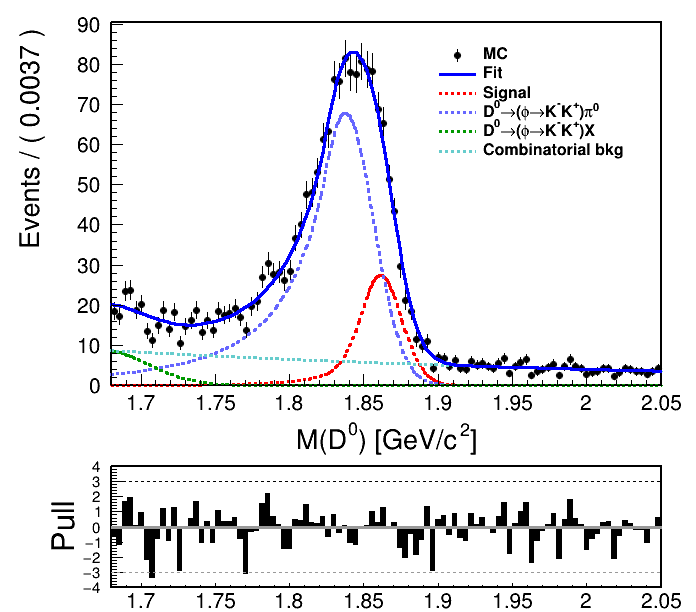

In [32]:
from IPython.display import Image
# Image("test2_x_D0.png")
Image(file1_name)

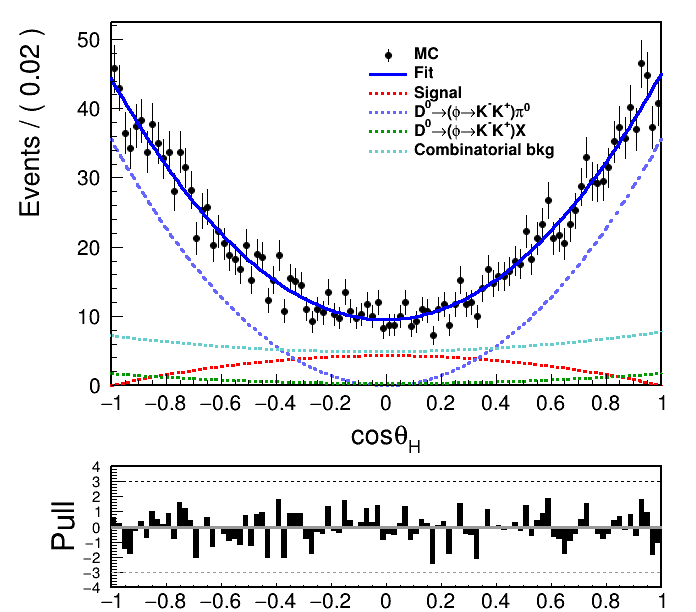

In [33]:
from IPython.display import Image
# Image("test2_x_D0.png")
Image(file2_name)

# Fit results 

In [34]:
extended_model.Print("t")


0x56105aef4550 RooAddPdf::extended_model = 0.132972 [Auto,Dirty] 
  0x56105af1af50/V- RooProdPdf::sig_model = 0.966086 [Auto,Dirty] 
  RooProdPdf begin partial integral cache
  [0]0x56105ae20420 RooAddPdf::x_sig_model = 0.966086 [Auto,Dirty] 
  [0]  0x56105aad6f40/V- RooGaussian::x_sig_sig1 = 0.959085 [Auto,Dirty] 
  [0]    0x561046c14750/V- RooRealVar::D0_M = 1.865
  [0]    0x5610494008c0/V- RooRealVar::x_sig_mean = 1.86124
  [0]    0x56104940ce30/V- RooRealVar::x_sig_sigma1 = 0.013007
  [0]  0x5610493f7270/V- RooRealVar::x_sig_sig1frac = 0.598328
  [0]  0x56105aa2bb20/V- RooCBShape::x_sig_sig2 = 0.976513 [Auto,Dirty] 
  [0]    0x561046c14750/V- RooRealVar::D0_M = 1.865
  [0]    0x5610494008c0/V- RooRealVar::x_sig_mean = 1.86124
  [0]    0x56104940c880/V- RooRealVar::x_sig_sigma2 = 0.0172444
  [0]    0x56105a8f7610/V- RooRealVar::x_sig_alpha = 0.667983
  [0]    0x56105a8e9760/V- RooRealVar::x_sig_n_CB = 19.9998
  [0]0x56105adefa00 MyPdf_one_minus_squared::y_sig_model = 1 [Auto,Dirty] 

In [35]:
# extended_model.Print("t")
print(nsig)
print(nbkg1)
print(nbkg2)
print(nbkg3)

RooRealVar::nsig = 286.78 +/- 24.6459  L(0 - 1061.38) 

RooRealVar::nbkg1 = 1184.11 +/- 52.0562  L(0 - 2122.75) 

RooRealVar::nbkg2 = 76.7887 +/- 114.42  L(0 - 1061.38) 

RooRealVar::nbkg3 = 575.083 +/- 99.8181  L(0 - 1061.38) 



In [36]:
base_file_loc =  '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/'
topo_file_D0 = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/' + 'topo/resultfile/result_phi/standard.root'
topo_file_D0bar = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/' + 'topo/resultfile/result_phi_cc/standard.root'

# Cut="D0_M>1.68 & D0_M<2.05 & abs(Phi_M - 1.0195) < 0.011 &  Dstarp_CMS_p>2.5  "
# Cut+="& gamma_E>0.47 & Pi0_Prob2>0.5 & abs(Dstarp_delM-0.1455)<0.00078"

base_cut = 'D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-0.1455)<0.00078 && Dstarp_CMS_p>2.5 && gamma_E>0.47 && Pi0_Prob2>0.5'
D0_cut = base_cut + ' && nSigCascDcyBr_0==1'
D0bar_cut = base_cut + ' && nSigCascDcyBr_4==1'
D0_tree = 'phi'
D0bar_tree = 'phi_cc'
# def get_Nevents(file, tree=str, base_filter=str, variables=list):
variables = ['D0_M']
Nsig = get_Nevents(topo_file_D0, D0_tree, D0_cut, variables )
Nsig_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_cut, variables )

D0_bkg1cut = base_cut + ' && iCascDcyBrP_Dst_0==1'
D0bar_bkg1cut = base_cut + ' && iCascDcyBrP_Dstm_0==0'
Nbkg1 = get_Nevents(topo_file_D0, D0_tree, D0_bkg1cut, variables )
Nbkg1_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg1cut, variables )

D0_bkg2cut = base_cut + ' && (iCascDcyBrP_Dst_0==7 || iCascDcyBrP_Dst_0==16 || iCascDcyBrP_Dst_0==12)'
D0bar_bkg2cut = base_cut + ' && (iCascDcyBrP_Dstm_0==6 || iCascDcyBrP_Dstm_0==5 || iCascDcyBrP_Dstm_0==23)'
Nbkg2 = get_Nevents(topo_file_D0, D0_tree, D0_bkg2cut, variables )
Nbkg2_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg2cut, variables )



D0_bkg3cut = base_cut + ' && iCascDcyBrP_Dst_0!=1 && nSigCascDcyBr_0!=1 && iCascDcyBrP_Dst_0!=7 && iCascDcyBrP_Dst_0!=16 && iCascDcyBrP_Dst_0!=12'
D0bar_bkg3cut = base_cut + ' && iCascDcyBrP_Dstm_0!=0 && nSigCascDcyBr_4!=1 && iCascDcyBrP_Dstm_0!=6 && iCascDcyBrP_Dstm_0!=5 && iCascDcyBrP_Dstm_0!=23'

charged_file_D0 = base_file_loc + 'charged/*.root'
mixed_file_D0 = base_file_loc + 'mixed/*.root'
uubar_file_D0 = base_file_loc + 'uubar/*.root'
ddbar_file_D0 = base_file_loc + 'ddbar/*.root'
ssbar_file_D0 = base_file_loc + 'ssbar/*.root'
taupair_file_D0 = base_file_loc + 'taupair/*.root'

Nbkg3 = get_Nevents(topo_file_D0, D0_tree, D0_bkg3cut, variables )

Nbkg3 += get_Nevents(charged_file_D0, D0_tree, base_cut, variables )
Nbkg3 += get_Nevents(mixed_file_D0, D0_tree, base_cut, variables )
Nbkg3 += get_Nevents(uubar_file_D0, D0_tree, base_cut, variables )
Nbkg3 += get_Nevents(ddbar_file_D0, D0_tree, base_cut, variables )
Nbkg3 += get_Nevents(ssbar_file_D0, D0_tree, base_cut, variables )
Nbkg3 += get_Nevents(taupair_file_D0, D0_tree, base_cut, variables )

Nbkg3_cc = get_Nevents(topo_file_D0bar, D0bar_tree, D0bar_bkg3cut, variables )

Nbkg3_cc += get_Nevents(mixed_file_D0, D0bar_tree, base_cut, variables )
Nbkg3_cc += get_Nevents(uubar_file_D0, D0bar_tree, base_cut, variables )
Nbkg3_cc += get_Nevents(ddbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg3_cc += get_Nevents(ssbar_file_D0, D0bar_tree, base_cut, variables )
Nbkg3_cc += get_Nevents(taupair_file_D0, D0bar_tree, base_cut, variables )

In [37]:
scale_factor=1/4


In [38]:
Nsig=Nsig*scale_factor
Nsig_cc=Nsig_cc*scale_factor
Nbkg1=Nbkg1*scale_factor
Nbkg1_cc=Nbkg1_cc*scale_factor
Nbkg2=Nbkg2*scale_factor
Nbkg2_cc=Nbkg2_cc*scale_factor
Nbkg3=Nbkg3*scale_factor
Nbkg3_cc=Nbkg3_cc*scale_factor

Fit_Nsig = nsig.getValV()
Fit_Nsig_error = nsig.getError()

Fit_Nbkg1 = nbkg1.getValV()
Fit_Nbkg1_error = nbkg1.getError()
Fit_Nbkg2 = nbkg2.getValV()
Fit_Nbkg2_error = nbkg2.getError()
Fit_Nbkg3 = nbkg3.getValV()
Fit_Nbkg3_error = nbkg3.getError()



print(f'Nsig(D0)_topo={ Nsig }')
print(f'Nsig(D0bar)_topo={ Nsig_cc }')
print(f'Total: { Nsig + Nsig_cc }')
print(f'Fit: {Fit_Nsig}')
print(f'Pull = {(Fit_Nsig-Nsig-Nsig_cc)/Fit_Nsig_error}')
print('\n')
print(f'Nbkg1(D0)_topo={ Nbkg1 }')
print(f'Nbkg1(D0bar)_topo={ Nbkg1_cc }')
print(f'Total: { Nbkg1 + Nbkg1_cc }')
print(f'Fit: {Fit_Nbkg1}')
print(f'Pull = {(Fit_Nbkg1-Nbkg1-Nbkg1_cc)/Fit_Nbkg1_error}')
print('\n')
print(f'Nbkg2(D0)_topo={ Nbkg2 }')
print(f'Nbkg2(D0bar)_topo={ Nbkg2_cc }')
print(f'Total: { Nbkg2 + Nbkg2_cc }')
print(f'Fit: {Fit_Nbkg2}')
print(f'Pull = {(Fit_Nbkg2-Nbkg2-Nbkg2_cc)/Fit_Nbkg2_error}')

print('\n')
print(f'Nothers(D0)_topo={ Nbkg3 }')
print(f'Nothers(D0bar)_topo={ Nbkg3_cc }')
print(f'Total: { Nbkg3 + Nbkg3_cc }')
print(f'Fit: {Fit_Nbkg3}')
print(f'Pull = {(Fit_Nbkg3-Nbkg3-Nbkg3_cc)/Fit_Nbkg3_error}')

Nsig(D0)_topo=132.0
Nsig(D0bar)_topo=146.75
Total: 278.75
Fit: 286.7795027114849
Pull = 0.32579432323367946


Nbkg1(D0)_topo=595.75
Nbkg1(D0bar)_topo=578.25
Total: 1174.0
Fit: 1184.1061649431354
Pull = 0.19413939979461048


Nbkg2(D0)_topo=60.75
Nbkg2(D0bar)_topo=51.0
Total: 111.75
Fit: 76.78871794916562
Pull = -0.30555255202347953


Nothers(D0)_topo=246.25
Nothers(D0bar)_topo=259.5
Total: 505.75
Fit: 575.0828526962695
Pull = 0.6945918936076579


In [48]:
# data_dict = { 'Type' : ['signal', r'$D^0 \to \phi \pi^0$', r'$D^0 \to \phi X$', 'Others'],
data_dict = { r'$N_{topo}$': [Nsig + Nsig_cc , Nbkg1 + Nbkg1_cc,  Nbkg2 + Nbkg2_cc, Nbkg3+Nbkg3_cc],
             'Fit': [Fit_Nsig, Fit_Nbkg1, Fit_Nbkg2, Fit_Nbkg3],
             'Fit Error' : [Fit_Nsig_error, Fit_Nbkg1_error, Fit_Nbkg2_error, Fit_Nbkg3_error],
             'Pull': [(Fit_Nsig-Nsig-Nsig_cc)/Fit_Nsig_error, (Fit_Nbkg1-Nbkg1-Nbkg1_cc)/Fit_Nbkg1_error, (Fit_Nbkg2-Nbkg2-Nbkg2_cc)/Fit_Nbkg2_error , (Fit_Nbkg3-Nbkg3-Nbkg3_cc)/Fit_Nbkg3_error] 
            }

In [49]:
df = pd.DataFrame(data_dict)
df.index = ['Signal', r'$D^0 \to \phi \pi^0$', r'$D^0 \to \phi X$','Others']
df

,$N_{topo}$,Fit,Fit Error,Pull
Signal,278.75,286.779503,24.645926,0.325794
$D^0 \to \phi \pi^0$,1174.00,1184.106165,52.056228,0.194139
$D^0 \to \phi X$,111.75,76.788718,114.419866,-0.305553
Others,505.75,575.082853,99.818114,0.694592


In [50]:
print(df.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  \$N\_\{topo\}\$ &          Fit &   Fit Error &      Pull \\
\midrule
Signal               &      278.75 &   286.779503 &   24.645926 &  0.325794 \\
\$D\textasciicircum 0 \textbackslash to \textbackslash phi \textbackslash pi\textasciicircum 0\$ &     1174.00 &  1184.106165 &   52.056228 &  0.194139 \\
\$D\textasciicircum 0 \textbackslash to \textbackslash phi X\$     &      111.75 &    76.788718 &  114.419866 & -0.305553 \\
Others               &      505.75 &   575.082853 &   99.818114 &  0.694592 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_94259/2621526293.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [51]:
import csv

# CSV file name
csv_file = '/media/jykim/T7/saved_plots/Measurement/phi/mc15rd_fit_results.csv'

# Write the dictionary to a CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header row
    header = list(data_dict.keys())
    writer.writerow(header)
    
    # Write the data rows
    for row in zip(*data_dict.values()):
        writer.writerow(row)

print(f'Data saved to {csv_file}')

Data saved to /media/jykim/T7/saved_plots/Measurement/phi/mc15rd_fit_results.csv
